# PHYS 447B: Orbital Mechanics
## Homework 5

Shelby Quiring, 10157162, Feb 20th 2023

Questions: 4.13, 4.14, 4.17, 4.18

In [ ]:
# Library imports
import numpy as np
import matplotlib.pyplot as plt

### `Question 4.13`

For a spacecraft, the following orbital parameters are given: e = 1.2; perigee altitude = 200 km; i = 50◦; $\Omega$ = 75◦; ω = 80◦. Calculate r and v at perigee relative to 

(a) the perifocal reference frame, and
(b) the geocentric equatorial frame.

{Ans.: (a) $r = 6578 \hat{p} (km); v = 11.55\hat{q} (km/s)$, 

(b) $r = − 3726\hat{I} + 2181\hat{J} + 4962\hat{K}$ (km), 
$v = −4.188\hat{I} − 10.65\hat{J} + 1.536\hat{K} (km/s)$}


#### Answer 4.13

To solve this problem we implement the rotation matrix algorithm describes in Appendix D9:

In [6]:
# Answer 4.13

G = 6.67e-11
Me = 5.9e24 # kg
mu = G*Me
Re = 6370e3 # m

def sv_from_coe(h, e, omega, i, w, theta, mu):
    # Calculate the perifocal position and velocity
    rp = h**2/mu * 1/(1 + e*np.cos(theta)) * np.array([np.cos(theta), np.sin(theta), 0])
    vp = mu/h * np.array([-np.sin(theta), e + np.cos(theta), 0])

    # Calculate rotation matricies
    R_omega = np.array([
        [np.cos(omega), -np.sin(omega), 0],
        [np.sin(omega), np.cos(omega), 0],
        [0, 0, 1]
    ])

    R_i = np.array([
        [1, 0, 0],
        [0, np.cos(i), -np.sin(i)],
        [0, np.sin(i), np.cos(i)]        
    ])

    R_w = np.array([
        [np.cos(w), -np.sin(w), 0],
        [np.sin(w), np.cos(w), 0],
        [0, 0, 1]
    ])

    # Combine rotation matricied
    Q_1 = np.matmul(R_omega, R_i)
    Q_px = np.matmul(Q_1, R_w)

    # Calculate position and velocity in geocentric equatorial frame
    rg = np.matmul(Q_px, rp)
    vg = np.matmul(Q_px, vp)

    return rg, vg, rp, vp

e = 1.2
i = 50 * np.pi/180
omega = 75 * np.pi/180
w = 80 * np.pi/180
theta = 0

r_perigee = 200e3 + Re
h = np.sqrt(r_perigee * mu * (1 + e))

rg, vg, rp, vp = sv_from_coe(h, e, omega, i, w, theta, mu)

print('PERIFOCAL:')
print(f'Position: {np.round(rp*1e-3, 2)} [km]')
print(f'Velocity: {np.round(vp*1e-3, 2)} [km/s]')

print('\nGEOCENTRIC EQUATORIAL:')
print(f'Position: {np.round(rg*1e-3, 2)} [km]')
print(f'Velocity: {np.round(vg*1e-3, 2)} [km/s]')


PERIFOCAL:
Position: [6570.    0.    0.] [km]
Velocity: [-0.   11.48  0.  ] [km/s]

GEOCENTRIC EQUATORIAL:
Position: [-3721.96  2178.41  4956.45] [km]
Velocity: [ -4.16 -10.59   1.53] [km/s]


### `Question 4.14`

For the spacecraft of Exercise 4.13 calculate $r$ and $v$ at two hours past perigee relative to
(a) the perifocal reference frame, and
(b) the geocentric equatorial frame.

{Ans.: 

(a) r = −26 340 $\hat{p}$ + 37 810 $\hat{q}$ (km), v = −4.306 $\hat{p}$ + 3.298 $\hat{q}$ (km/s) 

(b) r = 1207 $\hat{I}$ − 43 600 $\hat{J}$ − 14 840 $\hat{K}$ (km), v = 1.243 $\hat{I}$ − 4.4700 $\hat{J}$ − 2.810 $\hat{K}$ (km/s)}

#### Answer 4.14

We continue to use code developed in Q4.13 to solve for position and velocity with a new true anomaly. The true anomaly can be calculated by generating a vector of true anomaly from 0 to $2\pi$, calculating the time since perigee for every element in the vector, then interpolating both arrays to get the true anomaly at 2 hours past perigee.

In [15]:
# Answer 4.14

from scipy.interpolate import interp1d
from scipy.integrate import cumtrapz

# Define inputs
G = 6.67e-11
Me = 5.9e24 # kg
mu = G*Me
Re = 6370e3 # m

e = 1.2
i = 50 * np.pi/180
omega = 75 * np.pi/180
w = 80 * np.pi/180
t = 2 * 3600 # s, time since perigee

# Calculate time for all true anomalies and interpolate to get theta at t
thetavec = np.linspace(0, 2*np.pi, 1000)
integrand = 1 / (1 + e*np.cos(thetavec))**2
timevec = [0] + list(h**3/mu**2 * cumtrapz(integrand, thetavec))
f_theta = interp1d(timevec, thetavec, kind='cubic')
theta = f_theta(t)


r_perigee = 200e3 + Re
h = np.sqrt(r_perigee * mu * (1 + e))

rg, vg, rp, vp = sv_from_coe(h, e, omega, i, w, theta, mu)

print('PERIFOCAL:')
print(f'Position: {np.round(rp*1e-3, 2)} [km]')
print(f'Velocity: {np.round(vp*1e-3, 2)} [km/s]')

print('\nGEOCENTRIC EQUATORIAL:')
print(f'Position: {np.round(rg*1e-3, 2)} [km]')
print(f'Velocity: {np.round(vg*1e-3, 2)} [km/s]')

PERIFOCAL:
Position: [-26159.91  37649.76      0.  ] [km]
Velocity: [-4.29  3.28  0.  ] [km/s]

GEOCENTRIC EQUATORIAL:
Position: [  1164.16 -43400.54 -14726.95] [km]
Velocity: [ 1.24 -4.45 -2.8 ] [km/s]


### `Question 4.17`

A satellite in earth orbit has the following orbital parameters: a = 7016 km, e = 0.05,
i = 45◦, $\Omega$ = 0◦, ω = 20◦ and θ = 10◦. Find the position vector in the geocentricequatorial frame.
{Ans.: r = 5776.4 $\hat{I}$ + 2358.2 $\hat{J}$ + 2358.2 $\hat{K}$ (km)}

#### Answer 4.17

We calculate angular momentum $h$ from the semimajor axis $a$ using Equation 2.61 (below), and apply the function developed for Q4.13.

\begin{equation}
a = \frac{h^2}{\mu} \frac{1}{1-e}
\end{equation}

In [16]:
# Answer 4.17

# Define inputs
G = 6.67e-11
Me = 5.9e24 # kg
mu = G*Me
Re = 6370e3 # m

a = 7016e3
e = 0.05
i = 45 * np.pi/180
omega = 0 * np.pi/180
w = 20 * np.pi/180
theta = 10 * np.pi/180

h = np.sqrt(a * mu * (1 - e**2))

rg, vg, rp, vp = sv_from_coe(h, e, omega, i, w, theta, mu)

print('PERIFOCAL:')
print(f'Position: {np.round(rp*1e-3, 2)} [km]')
print(f'Velocity: {np.round(vp*1e-3, 2)} [km/s]')

print('\nGEOCENTRIC EQUATORIAL:')
print(f'Position: {np.round(rg*1e-3, 2)} [km]')
print(f'Velocity: {np.round(vg*1e-3, 2)} [km/s]')

PERIFOCAL:
Position: [6568.69 1158.24    0.  ] [km]
Velocity: [-1.3   7.76  0.  ] [km/s]

GEOCENTRIC EQUATORIAL:
Position: [5776.41 2358.21 2358.21] [km]
Velocity: [-3.88  4.84  4.84] [km/s]


### `Question 4.18`

Calculate the orbital inclination required to place an earth satellite in a 500 km by
1000 km sun-synchronous orbit.
{Ans.: 98.37◦}

#### Answer 4.18

To answer this question, we consider the precession of the ascending node $\dot{\Omega}$ due to oblateness perturbations:

\begin{gather}
\dot{\Omega} = -[ \frac{3}{2} \frac{\sqrt{\mu}J_2R^2}{(1-e^2)^2a^{\frac{7}{2}}} ]\cos{i}
\end{gather}

To be sun-synchronous, the orbit must precess at a rate of 1/360 degrees per day. 

Inclination for SSO: 97.1794 [deg]


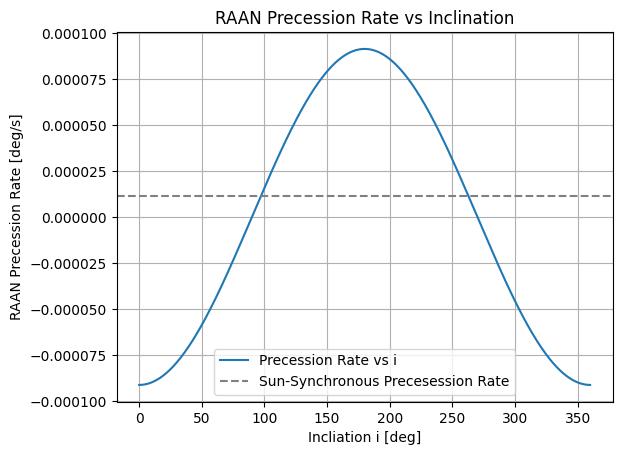

In [35]:
# Answer 4.18

# Define inputs
G = 6.67e-11
Me = 5.9e24 # kg
mu = G*Me
Re = 6370e3 # m
J2 =  1.08263e-3

omega_dot_target = 360/365.25 * (np.pi/180) / (24 * 3600)

a = Re + 1000e3 
b = Re + 500e3 

# Calculate eccentricity
e = np.sqrt(1 - b**2/a**2)

# Plot the problem
N = 1000
ivec = np.linspace(0, 2*np.pi, N) 
omega_dot = - ((3/2) * (np.sqrt(mu) * J2 * Re**2) / ((1-e**2)**2 * a**(7/2))) * np.cos(ivec)


fig, ax = plt.subplots()
ax.plot(ivec * (180 / np.pi), omega_dot * (180 / np.pi), label='Precession Rate vs i')
ax.axhline(omega_dot_target * (180 / np.pi), color='0.5', linestyle='--', label='Sun-Synchronous Precesession Rate')
ax.set_xlabel('Incliation i [deg]')
ax.set_ylabel('RAAN Precession Rate [deg/s]')
ax.set_title('RAAN Precession Rate vs Inclination')
ax.grid('enable')
ax.legend()

# Calculate i for SSO
i = np.arccos(omega_dot_target * - ((3/2) * (np.sqrt(mu) * J2 * Re**2) / ((1-e**2)**2*a**(7/2)))**-1)
print(f'Inclination for SSO: {np.round(i * 180/np.pi, 4)} [deg]') 
